TODO
- include profile information such as household type in the custer analysis
- monitor how clusters evolve dynamically over the months
- include control group data. We do not actually know what are users not on the platform doing. Maybe they are saving much more…

In [93]:
import datetime
import pandas as pd
import numpy as np


In [94]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline

# Import data

In [95]:
#import seaborn; 
#seaborn.set()

In [96]:
import pickle

In [97]:
base=pickle.load(open('./base_SES.pck','rb'))
cons=pickle.load(open('./cons_SES.pck','rb'))


## Import the baseline into a multicolumn DataFrame

In [99]:
# create a table by concatenating the baselines of all users
#basedf = [pd.concat([df],axis=1) for df in base['cons']]  <-- this creates a LIST non a Dataframe
baseline=pd.DataFrame()
for elem in base['cons']:
    baseline =pd.concat([baseline,elem], axis=1)

In [100]:
# extract the usernames to create the coulmn names
id2pos = {'id':base['user'],'pos':range(0,len(base))}

# assign the column names
baseline.columns = [x[1] for x in id2pos['id']]

# remove NaN
baseline.dropna()


,79,80,81,82,83,84,85,86,87,88,...,144,145,146,147,148,149,150,151,152,153
month,,,,,,,,,,,,,,,,,,,,,
2017-05-31,456.481,760.562,358.370,318.224,133.513,260.122,388.716,261.457,828.244,185.572,...,562.131,210.580,322.797,625.259,626.283,310.780,271.541,425.646,304.684,231.251
2017-06-30,227.124,544.328,422.738,358.857,169.949,34.194,348.973,252.570,824.793,225.440,...,400.207,220.998,339.299,561.062,817.808,81.661,207.449,370.442,286.399,201.199
2017-07-31,309.771,568.914,349.797,351.834,140.354,39.294,336.459,218.424,737.765,207.070,...,465.830,127.049,444.548,561.025,821.774,86.452,264.429,333.084,251.829,193.320
2017-08-31,346.875,535.292,401.216,362.265,176.047,36.225,373.168,230.551,741.102,207.970,...,458.046,96.826,446.410,609.375,876.898,85.032,292.814,353.005,320.578,197.725
2017-09-30,472.308,559.926,436.974,305.943,115.063,34.791,535.535,263.015,876.658,215.730,...,467.570,146.604,374.930,612.541,859.124,100.767,384.085,364.767,578.664,187.173
2017-10-31,369.948,687.506,437.011,372.790,143.061,44.000,534.715,594.475,1034.839,265.153,...,526.376,170.049,437.815,517.465,1291.350,106.313,389.590,455.315,1599.539,238.613
2017-11-30,509.492,1258.417,451.139,693.225,149.065,43.468,586.299,1154.950,1629.407,328.036,...,940.037,197.961,479.417,484.164,2964.415,146.144,540.021,748.935,788.851,246.461
2017-12-31,931.182,2206.278,532.253,1043.034,159.672,46.175,982.887,1448.760,2567.758,540.445,...,1887.031,148.208,561.549,1444.193,3412.849,238.220,554.852,1197.287,1668.610,296.702
2018-01-31,1129.855,1926.540,471.847,882.258,176.719,49.141,899.068,1220.582,2208.962,494.020,...,1353.353,194.002,542.426,1046.596,3292.295,204.086,552.744,890.277,1262.944,266.648


In [101]:
#remove april
base_no_april = baseline.drop(baseline.index[:1])
baseline_may_dec=base_no_april.drop(baseline.index[9:])

In [102]:
baseline_may_dec

,79,80,81,82,83,84,85,86,87,88,...,144,145,146,147,148,149,150,151,152,153
month,,,,,,,,,,,,,,,,,,,,,
2017-05-31,456.481,760.562,358.370,318.224,133.513,260.122,388.716,261.457,828.244,185.572,...,562.131,210.580,322.797,625.259,626.283,310.780,271.541,425.646,304.684,231.251
2017-06-30,227.124,544.328,422.738,358.857,169.949,34.194,348.973,252.570,824.793,225.440,...,400.207,220.998,339.299,561.062,817.808,81.661,207.449,370.442,286.399,201.199
2017-07-31,309.771,568.914,349.797,351.834,140.354,39.294,336.459,218.424,737.765,207.070,...,465.830,127.049,444.548,561.025,821.774,86.452,264.429,333.084,251.829,193.320
2017-08-31,346.875,535.292,401.216,362.265,176.047,36.225,373.168,230.551,741.102,207.970,...,458.046,96.826,446.410,609.375,876.898,85.032,292.814,353.005,320.578,197.725
2017-09-30,472.308,559.926,436.974,305.943,115.063,34.791,535.535,263.015,876.658,215.730,...,467.570,146.604,374.930,612.541,859.124,100.767,384.085,364.767,578.664,187.173
2017-10-31,369.948,687.506,437.011,372.790,143.061,44.000,534.715,594.475,1034.839,265.153,...,526.376,170.049,437.815,517.465,1291.350,106.313,389.590,455.315,1599.539,238.613
2017-11-30,509.492,1258.417,451.139,693.225,149.065,43.468,586.299,1154.950,1629.407,328.036,...,940.037,197.961,479.417,484.164,2964.415,146.144,540.021,748.935,788.851,246.461
2017-12-31,931.182,2206.278,532.253,1043.034,159.672,46.175,982.887,1448.760,2567.758,540.445,...,1887.031,148.208,561.549,1444.193,3412.849,238.220,554.852,1197.287,1668.610,296.702


## Import the consumption data into a multicoliumn dataframe

In [103]:
#consumption = [pd.concat([df],axis=1) for df in cons['cons']]
consumption=pd.DataFrame()
for elem in cons['cons']:
    consumption =pd.concat([consumption,elem], axis=1)

In [104]:
consumption.columns = [x[1] for x in id2pos['id']]


In [105]:
monthly=consumption.resample('M').sum()

In [106]:
monthly.isnull().sum().sum()

0

In [107]:
#remove april
monthly_no_april = monthly.drop(monthly.index[:1])

In [108]:
#remove january

#monthly_may_nov = monthly_no_april.drop(datetime.date(2018,12,31))
#monthly_may_nov
monthly_may_dec = monthly_no_april.drop(datetime.date(2019,1,31))
monthly_may_dec

,79,80,81,82,83,84,85,86,87,88,...,144,145,146,147,148,149,150,151,152,153
datetime,,,,,,,,,,,,,,,,,,,,,
2018-05-31,293.642,566.768,398.927,325.004,149.160,69.219,613.792,265.195,0,2526.314,...,463.508,172.903,285.163,568.670,877.899,106.687,355.623,386.219,421.581,200.540
2018-06-30,258.342,434.829,343.086,279.128,140.482,64.209,492.405,246.206,7.600,367.073,...,415.339,34.656,0,511.448,69.207,79.206,265.830,336.304,553.308,190.577
2018-07-31,272.401,424.423,402.252,277.056,174.856,74.863,379.435,148.899,141.791,206.094,...,418.200,106.016,352.946,514.117,461.168,84.369,264.739,325.132,578.710,201.028
2018-08-31,267.952,399.140,472.635,280.147,212.907,77.701,431.616,220.655,154.502,410.361,...,380.321,23.489,230.224,559.682,1145.402,83.026,294.305,187.787,530.018,209.993
2018-09-30,252.563,373.868,546.690,301.085,113.322,65.886,473.514,259.191,78.605,187.404,...,574.145,0,0,496.716,953.550,82.871,316.015,284.061,953.974,157.299
2018-10-31,163.150,555.217,663.623,463.232,143.945,66.369,664.258,412.310,10.247,226.473,...,575.156,28.592,99.779,639.716,1061.161,143.931,411.848,424.042,525.032,209.849
2018-11-30,721.553,1013.908,671.317,659.790,160.176,69.524,809.871,806.202,107.653,328.874,...,978.939,197.877,431.457,610.442,2333.462,168.132,457.017,624.671,828.097,269.792
2018-12-31,838.160,1732.867,579.453,1023.195,142.555,85.840,776.896,1305.861,61.036,399.637,...,1595.791,152.054,574.871,833.489,4480.389,201.591,524.448,853.832,1394.723,329.630


## Import  activity data

In [147]:
act=pickle.load(open('./activity_SES.pck','rb'))

In [161]:
actions=pd.DataFrame()
for elem in act['activity']:
    actions =pd.concat([actions,elem], axis=1)

In [162]:
# extract the usernames to create the coulmn names
id2pos = {'id':act['user'],'pos':range(0,len(act))}




In [164]:
# assign the column names
actions.columns = [x[2] for x in id2pos['id']]


#actions.dropna()



In [170]:
monthly_actions=actions.resample('M').sum()
monthly_actions

,79,80,81,82,83,84,85,86,87,88,...,144,145,146,147,148,149,150,151,152,153
week,,,,,,,,,,,,,,,,,,,,,
2018-06-30,105,78,89.0,70.0,87.0,76.0,90,122.0,25.0,11.0,...,1.0,9.0,1.0,0.0,74.0,6.0,31.0,61,52.0,18.0
2018-07-31,291,98,97.0,77.0,94.0,1.0,124,111.0,2.0,24.0,...,187.0,1.0,1.0,0.0,84.0,1.0,1.0,324,9.0,151.0
2018-08-31,353,33,6.0,15.0,3.0,0.0,22,17.0,39.0,14.0,...,21.0,1.0,5.0,2.0,1.0,0.0,0.0,184,81.0,4.0
2018-09-30,283,49,9.0,9.0,0.0,0.0,36,14.0,5.0,9.0,...,18.0,1.0,1.0,1.0,26.0,0.0,0.0,216,2.0,0.0
2018-10-31,18,75,4.0,5.0,9.0,0.0,22,12.0,1.0,5.0,...,25.0,1.0,1.0,1.0,3.0,1.0,1.0,109,1.0,2.0
2018-11-30,19,108,8.0,0.0,5.0,0.0,21,13.0,4.0,30.0,...,12.0,2.0,2.0,0.0,2.0,1.0,0.0,99,21.0,10.0
2018-12-31,29,166,10.0,5.0,0.0,0.0,30,16.0,1.0,3.0,...,19.0,0.0,1.0,0.0,4.0,0.0,1.0,29,1.0,0.0
2019-01-31,16,236,1.0,0.0,1.0,0.0,19,6.0,1.0,6.0,...,12.0,0.0,0.0,1.0,0.0,1.0,0.0,56,1.0,0.0


In [179]:
log=pickle.load(open('./logins_SES.pck','rb'))

In [182]:
logins=pd.DataFrame()
for elem in log['logins']:
    logins =pd.concat([logins,elem], axis=1)

In [183]:
# extract the usernames to create the coulmn names
id2pos = {'id':log['user'],'pos':range(0,len(log))}

# assign the column names
logins.columns = [x[2] for x in id2pos['id']]



In [184]:
monthly_logins=logins.resample('M').sum()
monthly_logins

,79,80,81,82,83,84,85,86,87,88,...,144,145,146,147,148,149,150,151,152,153
week,,,,,,,,,,,,,,,,,,,,,
2018-06-30,4559,679,3007.0,3492.0,2619.0,97.0,2134,2910.0,970.0,485.0,...,0.0,291.0,0.0,0.0,97.0,291.0,388.0,2425,970.0,582.0
2018-07-31,12416,388,3589.0,1455.0,970.0,0.0,2813,2328.0,194.0,776.0,...,2328.0,0.0,0.0,0.0,776.0,0.0,0.0,7372,679.0,582.0
2018-08-31,14744,873,970.0,1746.0,291.0,0.0,1843,1746.0,97.0,388.0,...,582.0,0.0,97.0,291.0,0.0,0.0,0.0,1746,291.0,97.0
2018-09-30,12319,1164,1649.0,1067.0,0.0,0.0,1746,1940.0,194.0,485.0,...,1358.0,0.0,0.0,0.0,97.0,0.0,0.0,2910,97.0,0.0
2018-10-31,3298,1358,679.0,388.0,194.0,0.0,1843,679.0,0.0,194.0,...,1455.0,0.0,0.0,0.0,97.0,0.0,0.0,3589,0.0,97.0
2018-11-30,2328,1746,679.0,0.0,291.0,0.0,1843,776.0,97.0,291.0,...,1164.0,0.0,0.0,0.0,0.0,0.0,0.0,4462,776.0,97.0
2018-12-31,1455,3007,485.0,97.0,0.0,0.0,1164,1261.0,0.0,97.0,...,970.0,0.0,0.0,0.0,97.0,0.0,0.0,1358,194.0,0.0
2019-01-31,1067,2231,97.0,0.0,0.0,0.0,776,291.0,0.0,97.0,...,485.0,0.0,0.0,0.0,0.0,0.0,0.0,1067,0.0,0.0


# Data analysis

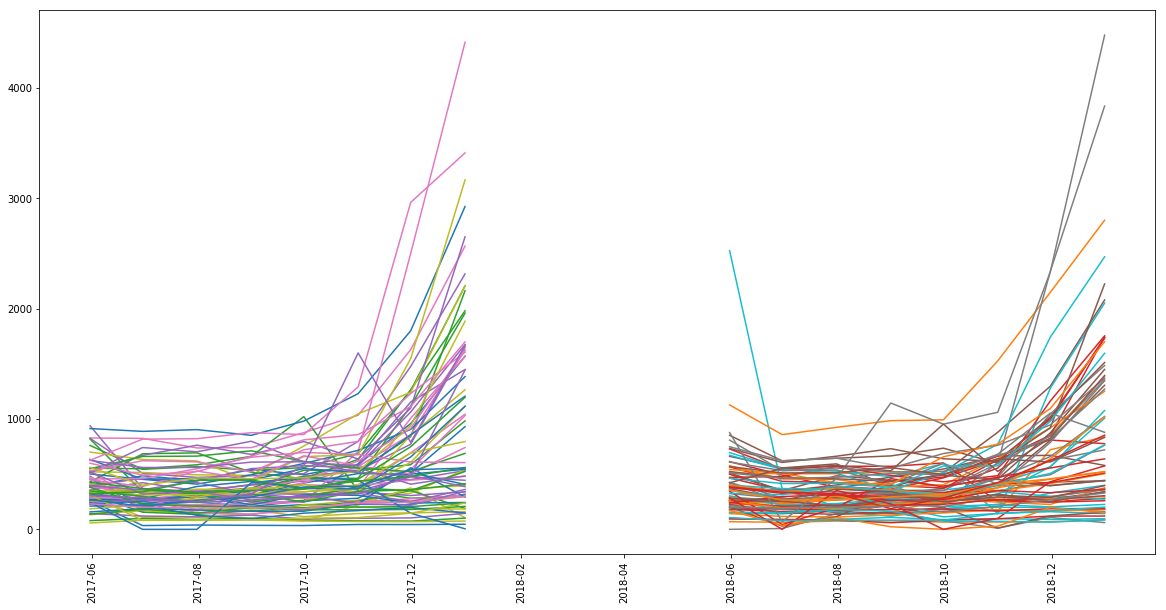

In [109]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
for i in monthly.columns:
    plt.plot(baseline_may_dec[i])
    plt.plot(monthly_may_dec[i])

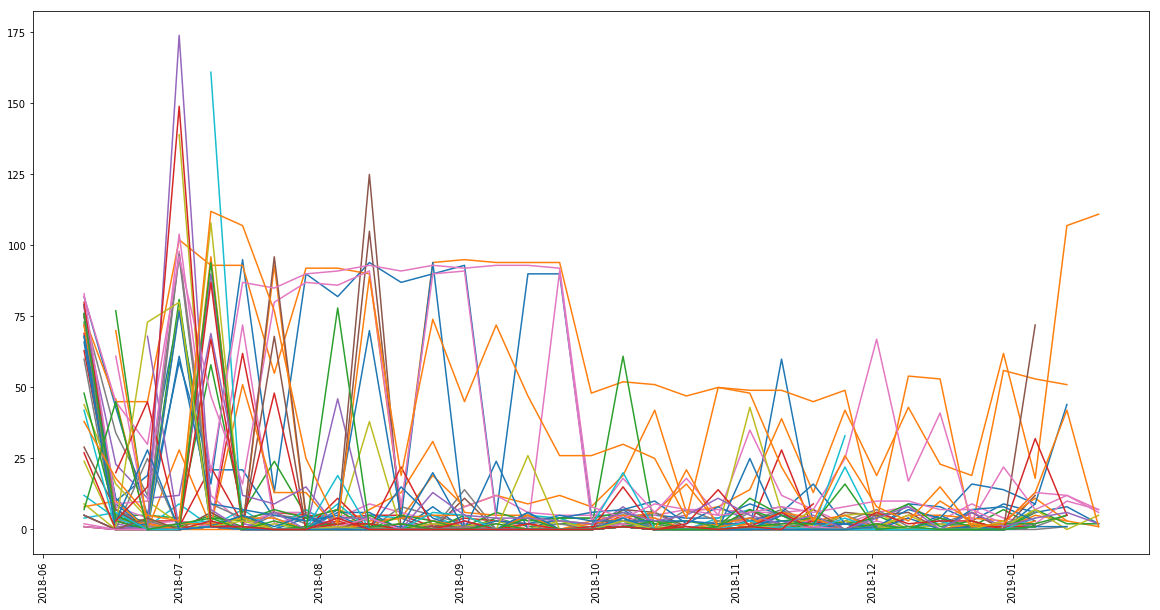

In [191]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
for i in actions.columns:
    plt.plot(actions[i])


### Group analysis

In [374]:
group_mean=monthly_may_dec.mean(1)
print(group_mean)

datetime
2018-05-31    414.500270
2018-06-30    306.003595
2018-07-31    325.113541
2018-08-31    337.298027
2018-09-30    350.152432
2018-10-31    409.107514
2018-11-30    626.272946
2018-12-31    916.281122
Freq: M, dtype: float64


In [382]:
group_baseline_mean=baseline_may_dec.mean(1)
group_baseline_mean.index=group_baseline_mean.index.shift(12)
print(group_baseline_mean)

month
2018-05-31     402.230203
2018-06-30     346.217176
2018-07-31     345.267405
2018-08-31     361.388608
2018-09-30     406.803959
2018-10-31     464.732932
2018-11-30     677.254054
2018-12-31    1037.658527
Freq: M, dtype: float64


In [383]:
group_savings = (group_baseline_mean-group_mean )/group_baseline_mean
group_savings

month
2018-05-31   -0.030505
2018-06-30    0.116151
2018-07-31    0.058372
2018-08-31    0.066661
2018-09-30    0.139260
2018-10-31    0.119693
2018-11-30    0.075276
2018-12-31    0.116972
Freq: M, dtype: float64

### Individual analysis

In [360]:
row_mean = monthly.mean(0)
print(row_mean[0:5])

79    391.8686
80    687.1386
81    481.0246
82    441.4365
83    146.0874
dtype: float64


In [361]:
row_mean_base=baseline_may_dec.mean(0)
print(row_mean_base[0:5])

79    452.897625
80    890.152875
81    423.687250
82    475.771500
83    148.340500
dtype: float64


In [384]:
#percentage savings per user
pctg = (row_mean_base-row_mean)/row_mean_base*100;

pctg[:5]

79    13.475236
80    22.806675
81   -13.532942
82     7.216700
83     1.518870
dtype: float64

In [364]:
pctg.mean()

8.327561215388068

In [369]:
#remove outliers
for user in pctg.keys():
    user_mean=pctg[user]
    if user_mean < -100:
        print(user)
        pctg=pctg.drop(user)
    

In [464]:
s=pd.Series(pctg)
s.mean()

8.327561215388068

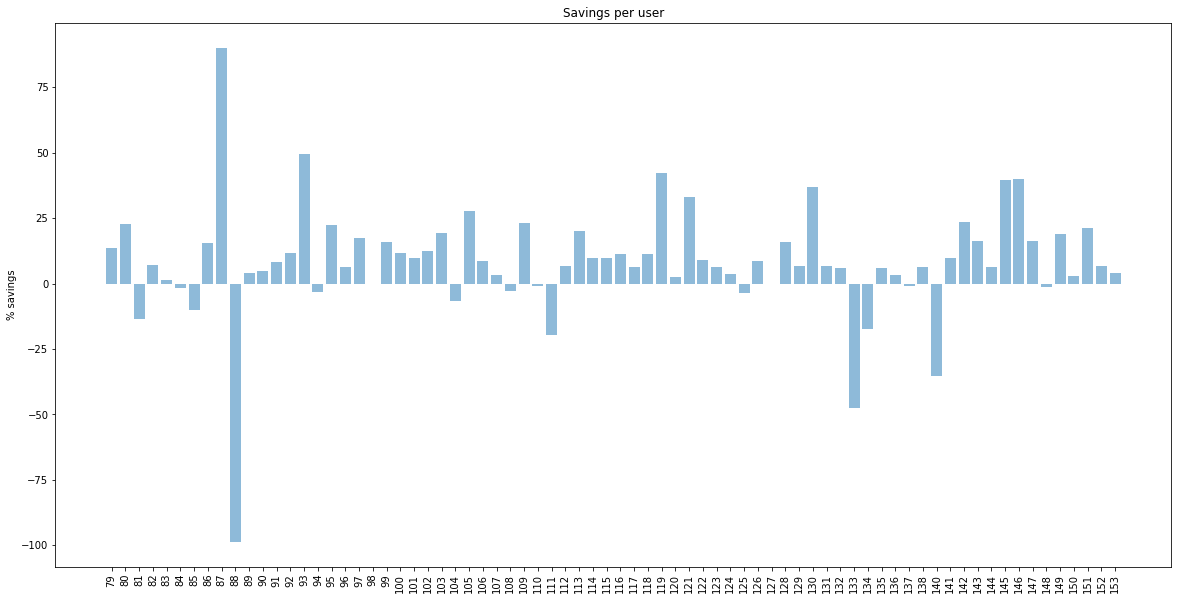

In [372]:
fig=plt.figure(figsize=(20,10))
y_pos = np.arange(len(pctg.keys()))
plt.bar(y_pos, pctg, align='center', alpha=0.5)
plt.xticks(y_pos, pctg.keys())
plt.xticks(rotation='vertical')
plt.ylabel('% savings')
plt.title('Savings per user') 
plt.show()
#fig.savefig("/Users/aer/Desktop/SES_savings_per_user.png")

## Focussed analysis on September, October, November and December

In [295]:
cons_sept_dec=monthly[5:9]
base_sept_dec=baseline_may_dec[4:]
monthly_actions_sept_dec=monthly_actions[3:7]

In [402]:
mean_cons_sept_dec=cons_sept_dec.mean(0)
mean_base_sept_dec=base_sept_dec.mean(0)


In [465]:
pctg_sept_dec=(mean_base_sept_dec-mean_cons_sept_dec)/mean_base_sept_dec*100
s=pd.Series(pctg_sept_dec)
s.mean()

7.287771855989989

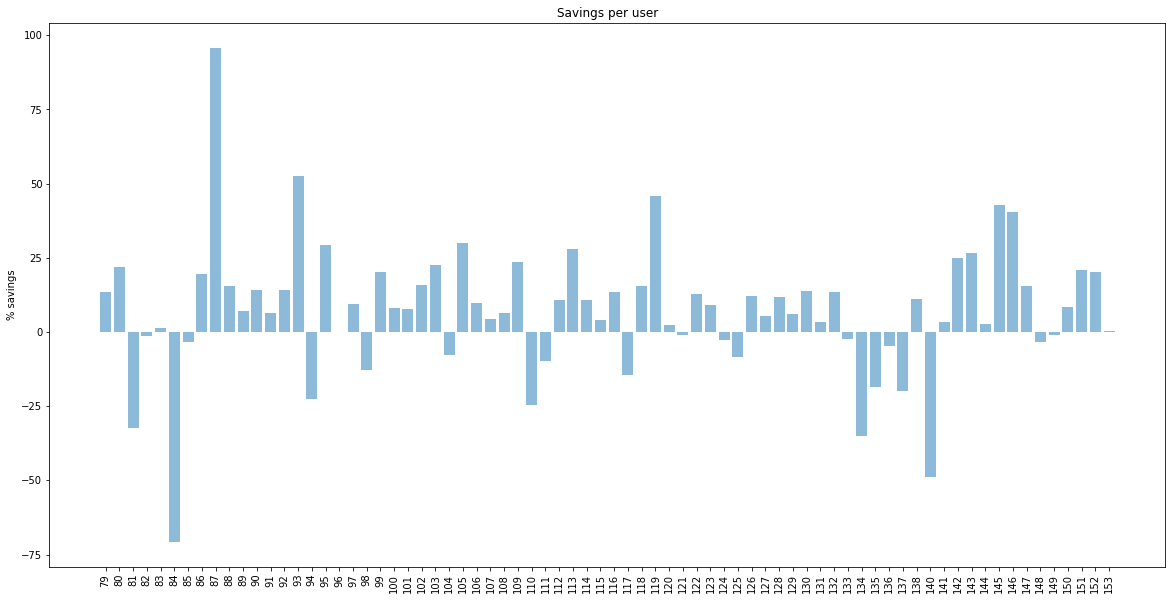

In [408]:
fig=plt.figure(figsize=(20,10))
y_pos = np.arange(len(pctg_sept_dec.keys()))
plt.bar(y_pos, pctg_sept_dec, align='center', alpha=0.5)
plt.xticks(y_pos, pctg_sept_dec.keys())
plt.xticks(rotation='vertical')
plt.ylabel('% savings')
plt.title('Savings per user') 
plt.show()

In [311]:

avg_actions=pd.Series(monthly_actions_sept_dec.mean(), index=monthly_actions_sept_dec.keys())
avg_actions.columns=['actions']
avg_actions[:10]

79    87.25
80    99.50
81     7.75
82     4.75
83     3.50
84     0.00
85    27.25
86    13.75
87     2.75
88    11.75
dtype: float64

In [312]:
action_quantiles=avg_actions.quantile([.1, .3, .5, .7])
action_quantiles.columns=['thresholds']
action_quantiles

0.1     0.500
0.3     1.475
0.5     4.750
0.7    11.775
dtype: float64

In [313]:
avg_actions.quantile(.1)

0.5

In [389]:
#utenti con attività sotto il .7 quantile
threshold=avg_actions.quantile(.7)
inactive_users =[i for i in avg_actions.index if avg_actions[i] < threshold]
active_users = [x for x in pctg.index if x not in inactive_users]

In [390]:
active_cons=pctg
active_cons=active_cons.drop(inactive_users)


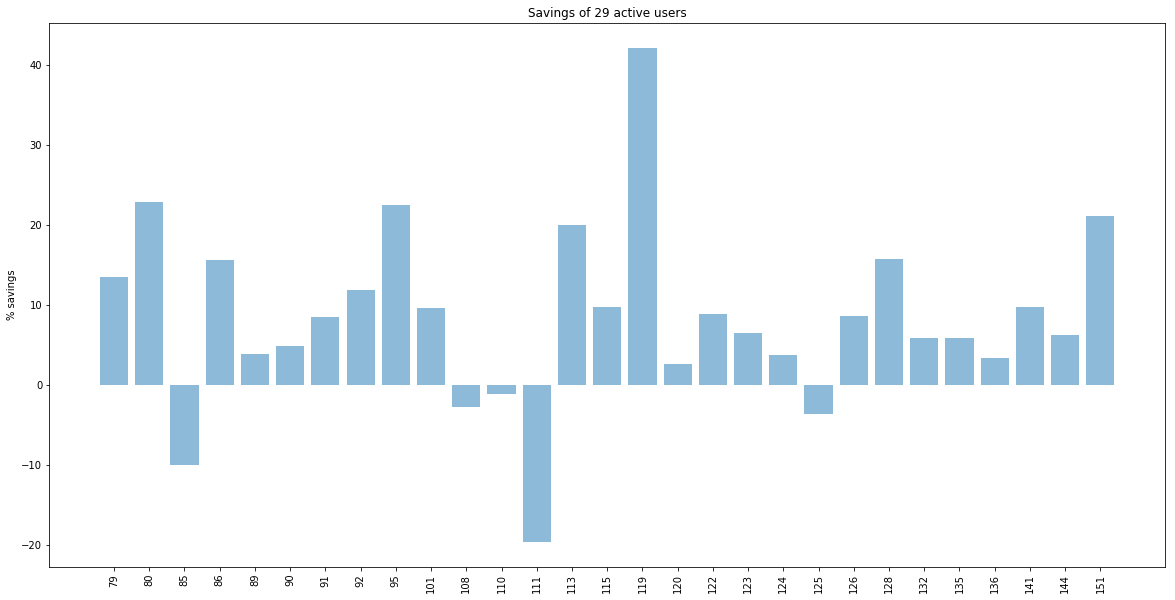

In [391]:
fig=plt.figure(figsize=(20,10))
y_pos = np.arange(len(active_cons.keys()))
plt.bar(y_pos, active_cons, align='center', alpha=0.5)
plt.xticks(y_pos, active_cons.keys())
plt.xticks(rotation='vertical')
plt.ylabel('% savings')
title = 'Savings of ' + str(len(out)) + ' active users' 
plt.title(title) 
plt.show()

In [392]:
s1=pd.Series(active_cons) 
s1.mean()

8.477703611272675

In [393]:
inactive_cons=pctg
inactive_cons=inactive_cons.drop(active_users)

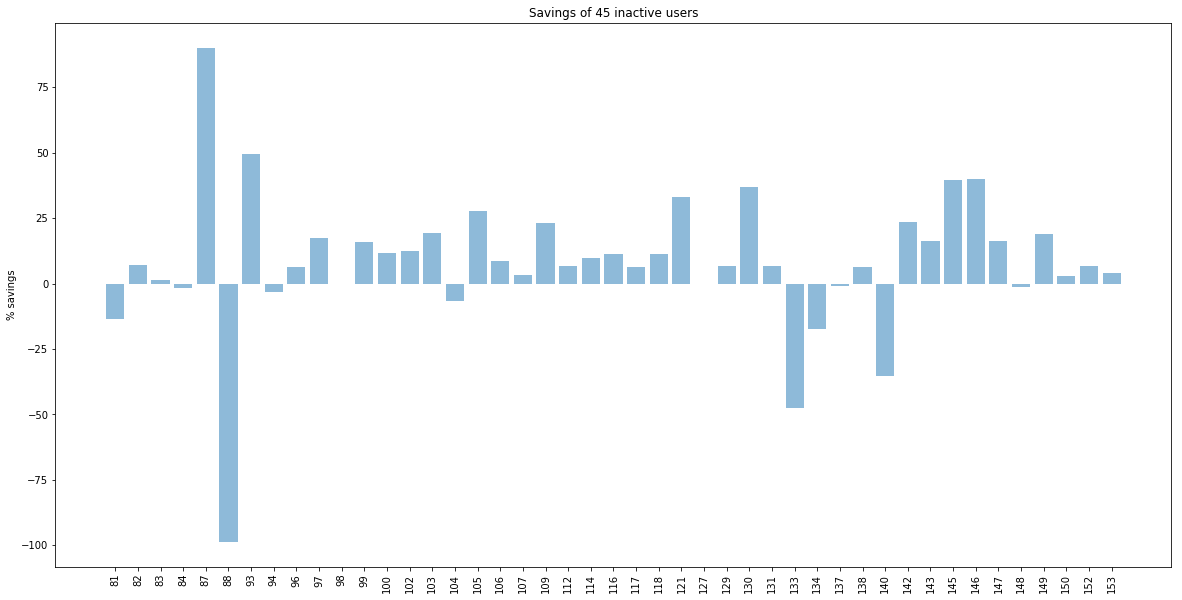

In [395]:
idx=inactive_cons.keys()
fig=plt.figure(figsize=(20,10))
y_pos = np.arange(len(idx))
plt.bar(y_pos, inactive_cons, align='center', alpha=0.5)
plt.xticks(y_pos, idx)
plt.xticks(rotation='vertical')
plt.ylabel('% savings')
title = 'Savings of ' + str(len(inactive_cons)) + ' inactive users' 
plt.title(title) 
plt.show()

In [396]:
s2=pd.Series(inactive_cons) 
s2.mean()

8.23080278248465

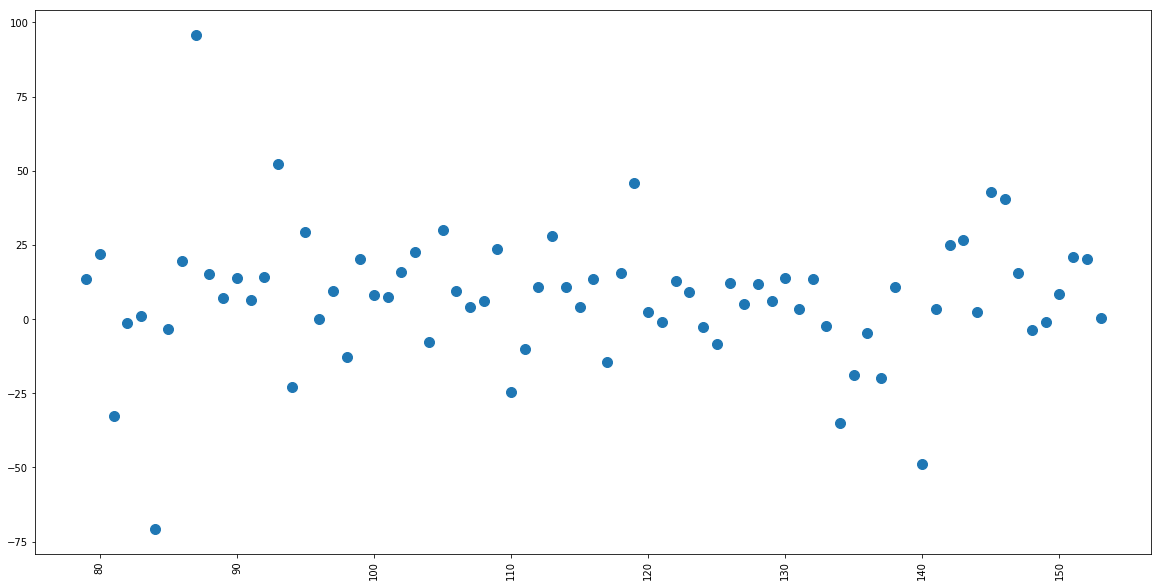

In [409]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.scatter(pctg_sept_dec.keys(), pctg_sept_dec, s=100)
#fig.savefig("/Users/aer/Desktop/SES_savings_pre_cluster.png")

### Clustering with k-Means

In [410]:
#now let's try to cluster the users according to their consumption
from sklearn.cluster import KMeans

In [411]:
cons=pctg_sept_dec.values
cons=cons.reshape(-1,1)

In [412]:
kmeans = KMeans(n_clusters=6) 
kmeans.fit(cons)
y_kmeans = kmeans.predict(cons)

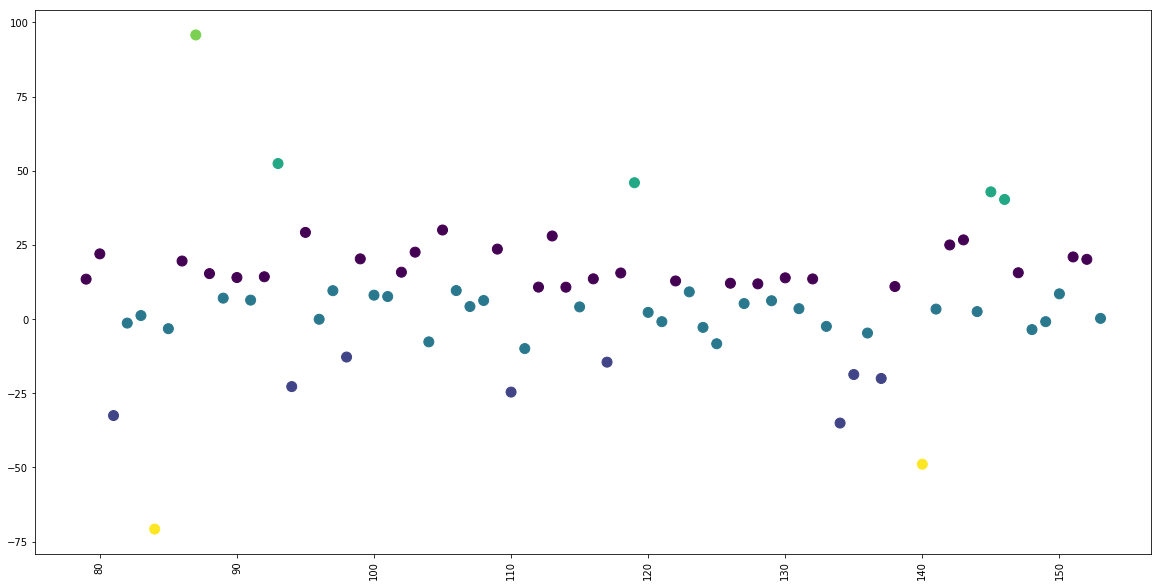

In [413]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.scatter(pctg_sept_dec.keys(), cons, c=y_kmeans, s=100, cmap='viridis')
#fig.savefig("/Users/aer/Desktop/SES_clustered_savings.png")

In [414]:
clustering=pd.Series(y_kmeans, index=pctg_sept_dec.keys())
clustering[:10]

In [416]:
clustering_outcome = pd.concat([pctg_sept_dec,clustering],axis=1 )
clustering_outcome[:10]

,0,1
79,13.469708,0
80,21.991491,0
81,-32.503148,1
82,-1.337893,2
83,1.210702,2
84,-70.760654,5
85,-3.224287,2
86,19.578065,0
87,95.784003,4
88,15.338782,0


In [141]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('SESanalysis.xlsx', engine='xlsxwriter')



In [136]:
clustering_outcome.columns=['consumption','cluster_id']
clustering_outcome.to_excel(writer, sheet_name='kmeans=6')

In [137]:
cluster_centers=pd.DataFrame(kmeans.cluster_centers_)
cluster_centers.columns=['cluster centres']
cluster_centers.to_excel(writer, sheet_name='cluster centres')


In [451]:
#create an array with consumption and activity
# but first create an index which includes only users for which we have both consumption and activity data
users=[]
for i in pctg_sept_dec.keys():
    if i in avg_actions.keys():
        users.append(i)
temp=[]
for i in users:
    temp.append([pctg_sept_dec[i],avg_actions[i] ])

X1=np.array(temp)


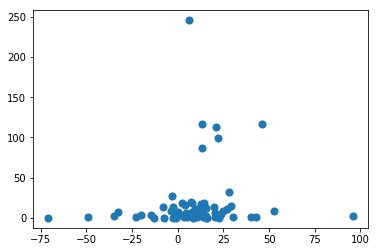

In [457]:
plt.scatter(X1[:, 0], X1[:, 1], s=50);

In [459]:
kmeans2 = KMeans(n_clusters=4) 
kmeans2.fit(X1)
y_kmeans2 = kmeans2.predict(X1)

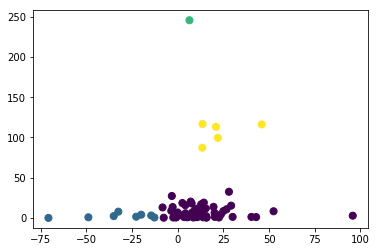

In [463]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans2, s=50, cmap='viridis')
fig.savefig("/Users/aer/Desktop/SES_kmeans_2features.png")

### Quantiles analysis

In [418]:
pctg_df=pd.DataFrame(cons, index=pctg_sept_dec.keys())
pctg_df[:10]

,0
79,13.469708
80,21.991491
81,-32.503148
82,-1.337893
83,1.210702
84,-70.760654
85,-3.224287
86,19.578065
87,95.784003
88,15.338782


In [419]:
thresholds=pctg_df.quantile([.1, .3, .5, .7])
thresholds.columns=['savings']
thresholds

,savings
0.1,-17.419596
0.3,0.216185
0.5,8.295696
0.7,14.046734


In [420]:
A =pctg_df[pctg_df[0] < pctg_df[0].quantile(.1)] #increase_more_19
B=pctg_df[(pctg_df[0] > pctg_df[0].quantile(.1)) & (pctg_df[0] <= pctg_df[0].quantile(.3) )] #increase_between_19_and_2
C=pctg_df[(pctg_df[0] > pctg_df[0].quantile(.3)) & (pctg_df[0] <= pctg_df[0].quantile(.5) )] #stable_between_2_and_minus4
D=pctg_df[(pctg_df[0] > pctg_df[0].quantile(.5)) & (pctg_df[0] <= pctg_df[0].quantile(.7) )] #savers > 3 < 11%
E=pctg_df[pctg_df[0] > pctg_df[0].quantile(.7)] #supersavers >11


In [66]:
# Write each dataframe to a different worksheet.
thresholds.to_excel(writer, sheet_name='thresholds')

A.to_excel(writer, sheet_name='much worse')
B.to_excel(writer, sheet_name='rather worse')
C.to_excel(writer, sheet_name='stable')
D.to_excel(writer, sheet_name='rather better')
E.to_excel(writer, sheet_name='much better')


### Classification based on thresholds


1. users who increased consumption: worse
2. rather stable consumption, no change: -3 to 2% —> for this one we prepared an additional letter : stable
3. savings until 10%: mild_savers
4. savings 10-20%:  savers 
5. supersavers over 20%: supersavers

In [142]:
worse=[]
worseidx=[]

stable=[]
stableidx=[]

mild_savers=[]
mild_saversidx=[]

savers=[]
saversidx=[]

supersavers=[]
supersaversidx=[]

In [143]:
for elem in pctg_col_mean.keys():
    if pctg_col_mean[elem] <-3:
        worse.append(pctg_col_mean[elem] )
        worseidx.append(elem)
    elif (pctg_col_mean[elem] >=-3) and (pctg_col_mean[elem] <2):
        stable.append(pctg_col_mean[elem] )
        stableidx.append(elem)
    elif (pctg_col_mean[elem] >=2) and (pctg_col_mean[elem] <10):
        mild_savers.append(pctg_col_mean[elem] )
        mild_saversidx.append(elem)
    elif (pctg_col_mean[elem] >=10) and (pctg_col_mean[elem] <20):
        savers.append(pctg_col_mean[elem] )
        saversidx.append(elem)
    elif (pctg_col_mean[elem] >=20):
        supersavers.append(pctg_col_mean[elem] )
        supersaversidx.append(elem)

In [144]:
worse_s=pd.Series(worse)
worse_s.index=worseidx

stable_s=pd.Series(stable)
stable_s.index=stableidx

mild_savers_s=pd.Series(mild_savers)
mild_savers_s.index=mild_saversidx

savers_s=pd.Series(savers)
savers_s.index=saversidx

supersavers_s=pd.Series(supersavers)
supersavers_s.index=supersaversidx

In [145]:
worse_s.to_excel(writer, sheet_name='worse <-3')
stable_s.to_excel(writer, sheet_name='-3 <=stable < 2')
mild_savers_s.to_excel(writer, sheet_name='2 <=mild_savers < 10')
savers_s.to_excel(writer, sheet_name='10 <=savers < 20')
supersavers_s.to_excel(writer, sheet_name='supersavers >= 10')

In [146]:

writer.save()

## Analysis of individual users

In [136]:
shifted_baseline=baseline_may_dec
shifted_baseline.index=monthly_may_dec.index


In [137]:
savings = monthly_may_dec-shifted_baseline

In [138]:
shifted_baseline.isnull().sum().sum()

0

DivisionByZero: [<class 'decimal.DivisionByZero'>]

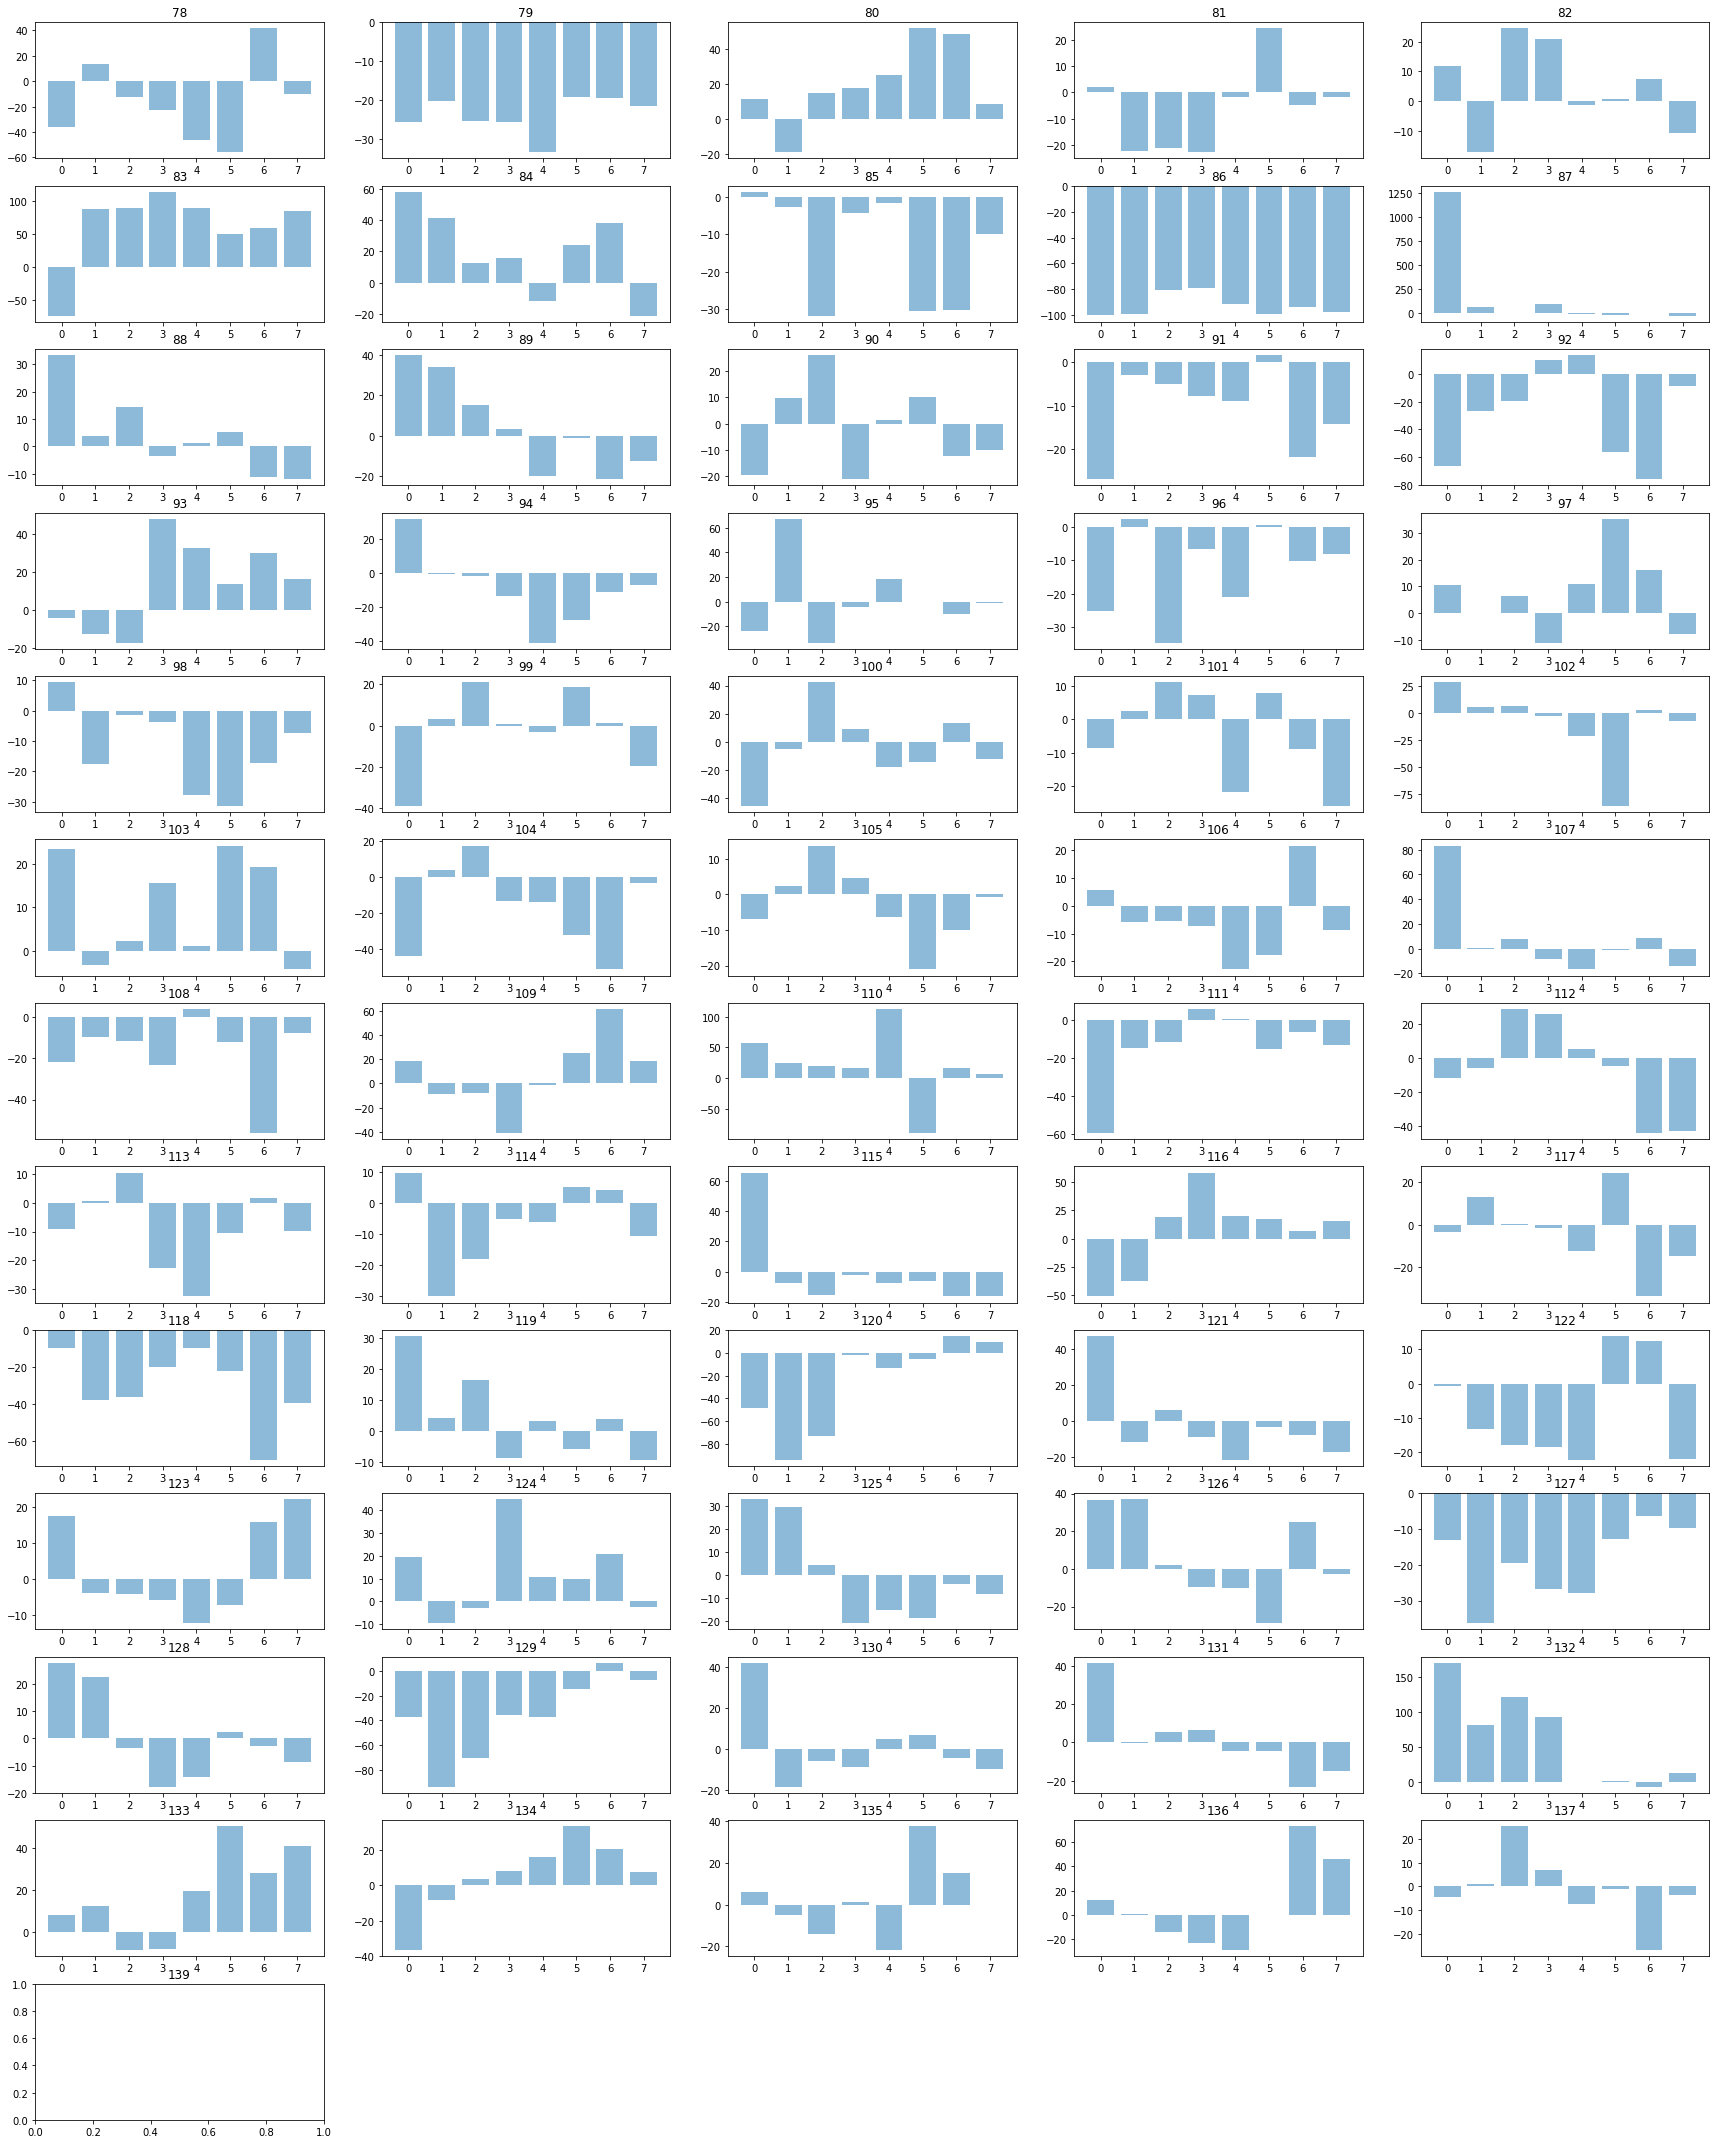

In [140]:
max=len(savings.keys())
fig=plt.figure(figsize=(30,3*max))
i=1
y_pos=np.arange(8) #number of months to display
for user in savings.keys()[:max]:
    plt.subplot(max, 5, i) 
    #plt.plot(savings[user])
    plt.title(user)
    plt.bar(y_pos, (savings[user]/shifted_baseline[user])*100, align='center', alpha=0.5)
    i=i+1
    

In [92]:
savings[139]

datetime
2018-05-31      12.235
2018-06-30     194.227
2018-07-31     188.634
2018-08-31    -189.811
2018-09-30    -231.073
2018-10-31     -69.320
2018-11-30     308.933
2018-12-31     515.101
Freq: M, Name: 139, dtype: object

In [93]:
shifted_baseline[139]

datetime
2018-05-31    242.495
2018-06-30      0.000
2018-07-31      0.000
2018-08-31    422.262
2018-09-30    473.231
2018-10-31    446.799
2018-11-30    145.948
2018-12-31      4.853
Freq: M, Name: 139, dtype: object